In [386]:
#objetive: Danger by Category of Species
#1) which types of species there are?
#2) Which is the general status for each category?
#3) Observations by Category
#4) It is related the amount of observations whith the status for a category?
#5) Was the AI prediction good enough? analyzing the danger proportion on species

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print(observations.head())
print('\n\n\n')
print(species.head())
#we don't need to change the data frames structure

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85




  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domes

In [387]:
#1rst: analysis about messy data for observations:

print(observations[observations.isnull().any(axis=1)]) #there are no columns with nulls, we need to check the string columns
print('\n\n')
print(observations.info())#types are the correct
print('\n\n')
print(observations.describe(include='all'))#there are no crasy values
print('\n\n')
for column in observations.columns:
    print(column+'\n')
    print(observations[column].value_counts()) #there's the same amount of data for each park and they all end with 'National Park'
    print('\n\n')#to many species, we must do our experiments by category and not by species as we wanted on a beggining
    
print('Dulpicated values')
print(observations[observations.duplicated()==True])#we have duplicated values
print('\n\n')

#there are no nulls and no strange names for park, but we need to be the complete list of uniwue values for scientific names:
print('Checking null names:')#we cannot print the 5k different names
null_names = ["null", "None", "N/A", "NA", "NaN", "", "NIL", "NUL", "NULL", "EMPTY", "BLANK", "UNDEFINED", "MISSING", "UNKNOWN", "VOID", "NOT APPLICABLE", "NOT AVAILABLE", "NOT PROVIDED", "NOT SET"]
count=0
for name in observations.scientific_name:
      if name in null_names:
          count+=1
print(count)
#no null values

Empty DataFrame
Columns: [scientific_name, park_name, observations]
Index: []



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None



         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.8

In [388]:
#correcting observations df

#deleting dulicateds
print(observations[observations.duplicated()==True])
observations = observations.drop_duplicates()
print(observations[observations.duplicated()==True])

#restructuring de data frame
observations['park_name'] = observations['park_name'].apply(lambda name: name[:-14])#quit the end of ' National Park'
print(observations.head())

#reset index because we deleted information
print('\n\n\n')
observations = observations.reset_index()
observations = observations.drop('index', axis=1)
print(observations.head(10))

              scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains National Park   
21151     Trifolium 

In [389]:
#2nd: analysis about messy data for species:

print(species[species.isnull().any(axis=1)])#there are a lot of null values
print('\n\n')
print(species.info())#conservation status has 5824 - 191 nul values -> more than the 60%, if we cannot save this column we must delete it
print('\n\n')
print(species.describe(include='all'))#only categorical data, maybe there's duplicated info (because of common names), there are only 7 categories
print('\n\n')
for column in species.columns:
    print(column+'\n')
    print(species[column].value_counts())
    print('\n\n')
    
print('Dulpicated values')
print(species[species.duplicated()==True])#no dulpicated data
print('\n\n\n')

#checking more nulls
for column in species.columns:
    print(column)
    count=0
    for name in observations.scientific_name:
          if name in null_names:
              count+=1
    print(count)
    print('\n\n')
    
#the only problem is that the conservations status is often null

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3     Domestic Sheep, Moufl

In [390]:
print(len(species) - len(species.scientific_name.unique()))
#we repeat the scientific name but not an exact row
#there's no a duplicated row, but we will delete rows that repeat all except the common_names (because is not important for these analysis)
common_rows = species.copy()
common_rows = common_rows.drop('common_names',axis=1)
common_rows = common_rows[common_rows.duplicated()==True]
print(len(common_rows))
#of 283 repeated names, 281 repeat also the category and status (2 of these 283 do not repeat these 3 columns)

#let's delete the species rows that match with species_recorted
species = species.drop(common_rows.index)
print(len(species))


283
281
5543


In [391]:
#creating a new data frames in other cell to not doing this each time i run the below cell
no_null_species = species[~species.conservation_status.isna()]
new_species = no_null_species.drop('common_names', axis=1)#to see each row on the same line of my computer

In [392]:
#correcting null values for species.conservation_status

#seeing type of no null values
print('Null values: '+str(round(100 -len(new_species)/len(species)*100,3))+'%')
print(new_species.head(60))
print('\n\n\n\nrandom data')
print(new_species.sample(n=50))#seeing random rows

#we don't see a patern of missing data

Null values: 96.753%
    category               scientific_name conservation_status
7     Mammal                 Canis latrans  Species of Concern
8     Mammal                   Canis lupus          Endangered
9     Mammal                   Canis rufus          Endangered
29    Mammal              Eptesicus fuscus  Species of Concern
30    Mammal     Lasionycteris noctivagans  Species of Concern
33    Mammal         Myotis austroriparius  Species of Concern
34    Mammal             Myotis grisescens          Endangered
35    Mammal                 Myotis keenii  Species of Concern
36    Mammal                 Myotis leibii  Species of Concern
37    Mammal              Myotis lucifugus  Species of Concern
38    Mammal        Myotis septentrionalis          Threatened
39    Mammal                Myotis sodalis          Endangered
72    Mammal  Glaucomys sabrinus coloratus          Endangered
91      Bird            Accipiter cooperii  Species of Concern
93      Bird            Accipiter 

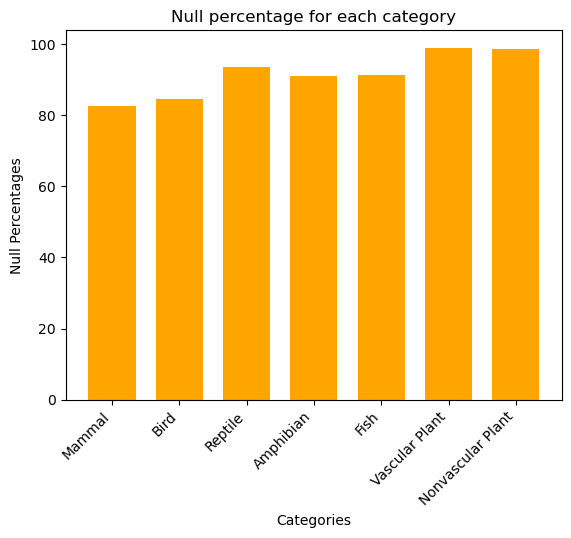

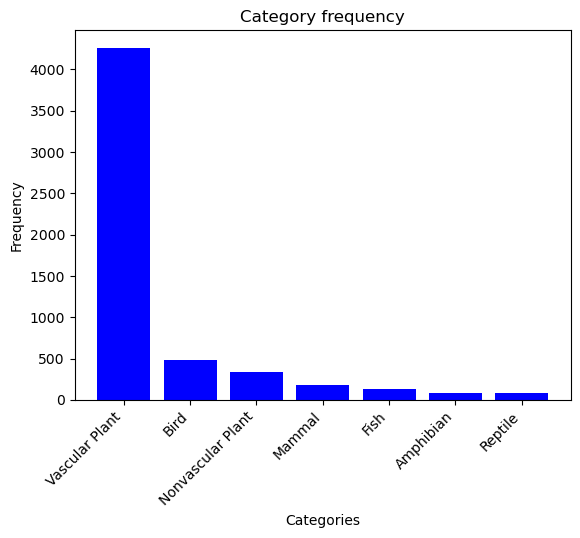

<Figure size 640x480 with 0 Axes>

In [434]:
#null percentage for each category
null_percentage = []
categories = species.category.unique()
for cat in categories:#we only have nulls on conservation statu
    nulls = species.conservation_status[species.category == cat].isna().sum()
    no_nulls =  species.conservation_status[species.category == cat].count()
    percentage = nulls / (no_nulls + nulls) * 100
    #print('category: '+cat+', percentage of nulls: '+str(percentage))
    null_percentage.append( percentage )

plt.bar(cateogries, null_percentage, color='orange', width=0.7)
plt.xlabel('Categories') 
plt.ylabel('Null Percentages')
plt.title('Null percentage for each category')
plt.xticks(rotation=45, ha='right')#to see the categorical names rotated
plt.show()
plt.savefig('1-Null_percentage_for_each_category.png', bbox_inches='tight')
plt.clf()

category_frequency = species['category'].value_counts()
plt.bar(category_frequency.index, category_frequency.values, color='blue') 
plt.xlabel('Categories') 
plt.ylabel('Frequency')
plt.title('Category frequency')
plt.xticks(rotation=45, ha='right')#to see the categorical names rotated
plt.show()
plt.clf()

#null values are distributed very equally, considering that the proportions of data is not equally distributed

In [394]:
#there's no null patern
#on categories, the chance of getting a null is almost the same
#only 1 row has null values -> the null chance of any data is not random
#null type : MAR
#we cannot eliminate them because it represents the 97% of the data, that's a lot so we are going to compare the analysis between the original data and the completed with AI data
#conclusion: use AI to complete values and remember that the data base won´t be exact

#to use the IA we need to convert our DataFrames data types into numbers. We need de df_test with no nulls and de original with all data
species_reduced = species.drop('common_names', axis=1)#we don't need this column
print(species_reduced.head())

#I can pivote the table, but for each different name i would have a column, so i preffer to replace each name with a number
def make_dictionary(column):
    i=0
    dictionary = {}
    for name in species_reduced[column].unique():
        dictionary.update({name:i})
        i+=1
    return dictionary

category_dicc = make_dictionary('category')
name_dicc = make_dictionary('scientific_name')
status_dicc = make_dictionary('conservation_status')
mother_dicc = {'category':category_dicc, 'scientific_name':name_dicc, 'conservation_status':status_dicc}

#print(category_dicc)
#print(name_dicc)
print(status_dicc)
#print(species_reduced.info())
species_num_original = species_reduced#select interesting columns
for column in species_num_original.columns:
    species_num_original[column] = species_num_original[column].apply(lambda name: mother_dicc[column][name])

#all columns are int type, but we have to put again null values:
species_num_original['conservation_status'] = species_num_original['conservation_status'].apply(lambda num: None if num==0 else num)

print(species_num_original.head(60))
print(species_num_original.info())

print('\n\n\n')

species_num_test = species_num_original[~species_num_original.conservation_status.isna()]
#species_num_test['conservation_status'] = species_num_test.conservation_status.astype(int)
print(species_num_test.head())
print(species_num_test.info())


  category                scientific_name conservation_status
0   Mammal  Clethrionomys gapperi gapperi                 NaN
1   Mammal                      Bos bison                 NaN
2   Mammal                     Bos taurus                 NaN
3   Mammal                     Ovis aries                 NaN
4   Mammal                 Cervus elaphus                 NaN
{nan: 0, 'Species of Concern': 1, 'Endangered': 2, 'Threatened': 3, 'In Recovery': 4}
    category  scientific_name  conservation_status
0          0                0                  NaN
1          0                1                  NaN
2          0                2                  NaN
3          0                3                  NaN
4          0                4                  NaN
5          0                5                  NaN
6          0                6                  NaN
7          0                7                  1.0
8          0                8                  2.0
9          0                9   

In [395]:
#let's generate the new data frame with complete entry

imp =IterativeImputer(max_iter=1000, random_state=0)
imp.fit(species_num_test)
species_num_complete =pd.DataFrame(np.round(imp.transform(species_num_original),0), columns=['category', 'scientific_name', 'conservation_status'])

print(species_num_test.conservation_status.mean())
print(species_num_complete[species_num_complete.conservation_status < 2].sample(60))
#print(species_num_complete[species_num_complete.conservation_status >= 2])

1.261111111111111
      category  scientific_name  conservation_status
4416       5.0           4414.0                  1.0
2539       5.0           2539.0                  1.0
2486       5.0           2486.0                  1.0
2537       5.0           2537.0                  1.0
1373       5.0           1373.0                  1.0
5226       5.0           5224.0                  1.0
3977       5.0           3975.0                  1.0
4738       5.0           4736.0                  1.0
4704       5.0           4702.0                  1.0
1683       5.0           1683.0                  1.0
1910       5.0           1910.0                  1.0
2171       5.0           2171.0                  1.0
534        4.0            534.0                  1.0
4152       5.0           4150.0                  1.0
4640       5.0           4638.0                  1.0
1125       5.0           1125.0                  1.0
743        5.0            743.0                  1.0
5423       5.0           542

In [396]:
#lets get the categories names again
def getKey(column, number):
    for key, value in mother_dicc[column].items():
        if value == number:
            return key
    return 'error'

species_completed = species_num_complete.copy()

for column in species_num_complete.columns:
    species_completed[column] = species_num_complete[column].apply(lambda value: getKey(column, value))
    
print(species_completed.sample(60))

               category                        scientific_name  \
4175     Vascular Plant                    Ranunculus macounii   
2275     Vascular Plant                       Panicum virgatum   
162                Bird               Coccyzus erythropthalmus   
355                Bird                         Megascops asio   
2114     Vascular Plant                   Juncus diffusissimus   
4401               Fish                         Cottus gulosus   
2499     Vascular Plant                       Geum virginianum   
750      Vascular Plant                      Aster retroflexus   
4042     Vascular Plant                    Agrostis variabilis   
1107     Vascular Plant                        Stellaria media   
5043     Vascular Plant                        Mimulus pilosus   
5101     Vascular Plant     Zigadenus venenosus var. venenosus   
5054     Vascular Plant                 Collinsia heterophylla   
1529     Vascular Plant                    Geranium thunbergii   
4775     V

In [397]:
#we have the DFs: 'observations' 'species' and 'species_completed', beeing the last one a version completed with AI and whithout the 'commmon_names' column

print(observations.head())
print('\n\n\n')
print(species.head())
print('\n\n\n')
print(species_completed.head())


            scientific_name              park_name  observations
0        Vicia benghalensis  Great Smoky Mountains            68
1            Neovison vison  Great Smoky Mountains            77
2         Prunus subcordata               Yosemite           138
3      Abutilon theophrasti                  Bryce            84
4  Githopsis specularioides  Great Smoky Mountains            85




  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red She

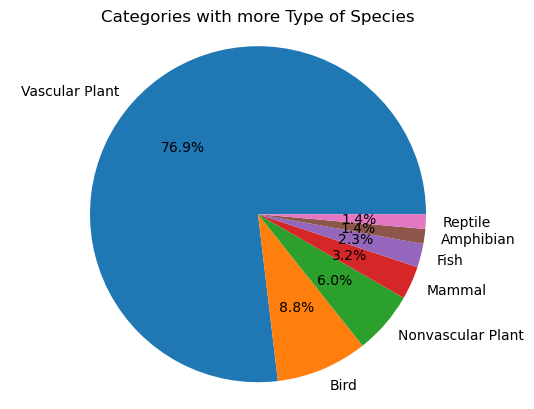

<Figure size 640x480 with 0 Axes>

In [398]:
#we cleaned the data frames, let's answer our questions and make graphs about it!

#1) Question
category_frequency = species['category'].value_counts()
plt.pie(category_frequency.values, labels=category_frequency.index, autopct='%0.1f%%') #to see percentages
plt.axis('equal')#to see it circular 
plt.title('Categories with more Type of Species')
plt.show()
plt.clf()
#Vascular Plants have a big variety of differents species and names

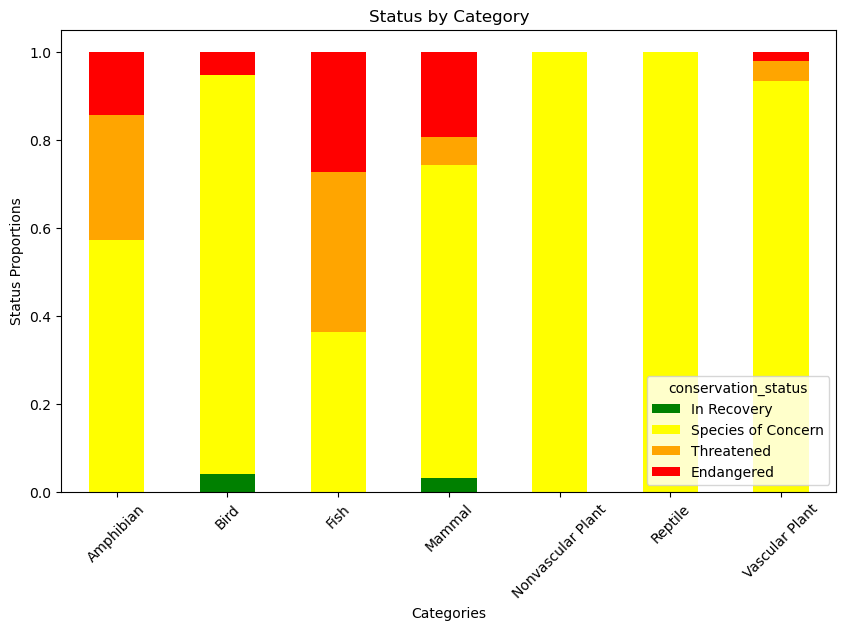

<Figure size 640x480 with 0 Axes>

In [399]:
#2) Question
grouped = species.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
column_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']#reorder
colors = ['green', 'yellow', 'orange', 'red']
grouped_norm = grouped_norm[column_order]
grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Categories') 
plt.ylabel('Status Proportions') 
plt.title('Status by Category')
plt.xticks(rotation=45)
plt.show()
plt.clf()

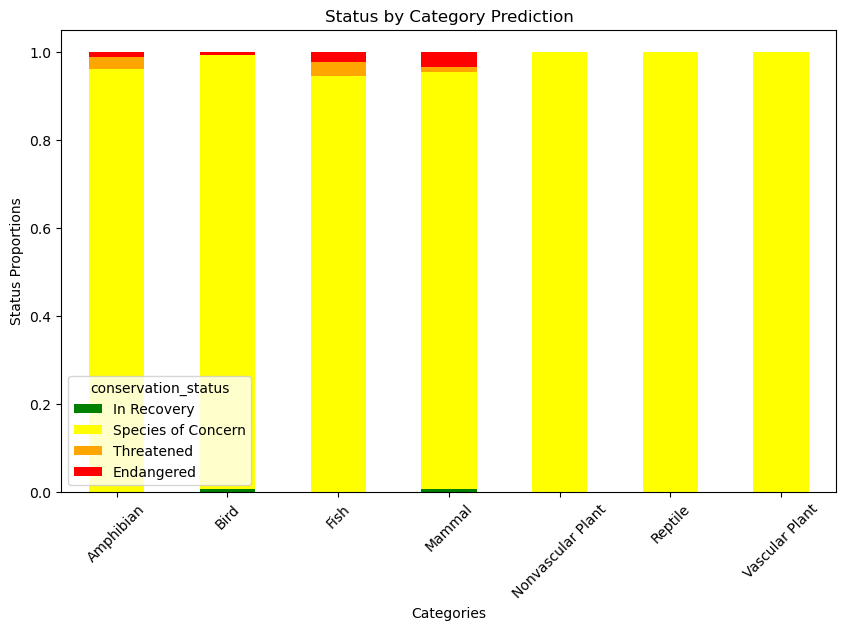

<Figure size 640x480 with 0 Axes>

In [400]:
grouped = species_completed.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
column_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']#reorder
colors = ['green', 'yellow', 'orange', 'red']
grouped_norm = grouped_norm[column_order]
grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Categories') 
plt.ylabel('Status Proportions') 
plt.title('Status by Category Prediction')
plt.xticks(rotation=45)
plt.show()
plt.clf()
#The AI suggest that the percentages of bad status are less

In [401]:
#3) Question
category_observations = {}
for category in species.category.unique():
    category_observations[category]=0
#print (category_observations)

def increment_dictionary(name, obs):
    cat = species[species.scientific_name == name]
    key = str(cat.category.unique())[2:-2]
    category_observations[key]+=obs

observations.apply(lambda row: increment_dictionary(row.scientific_name, row.observations), axis=1)
#print (category_observations)

0        None
1        None
2        None
3        None
4        None
         ... 
23276    None
23277    None
23278    None
23279    None
23280    None
Length: 23281, dtype: object

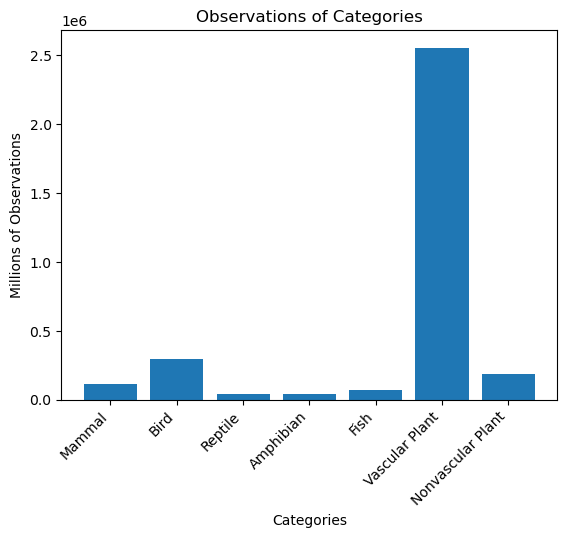

<Figure size 640x480 with 0 Axes>

In [402]:
categories = []
obs =[]
for key, value in category_observations.items():
    categories.append(key)
    obs.append(value)
    
category_frequency = species['category'].value_counts()

plt.bar(categories, obs)
plt.xlabel('Categories') 
plt.ylabel('Millions of Observations')
plt.title('Observations of Categories')
plt.xticks(rotation=45, ha='right')#to see the categorical names rotated
plt.show()
plt.clf()
#before we saw amount of species types for each category
#it seems that a high amount of observations is correlated whtith a good status, let's combine graphs

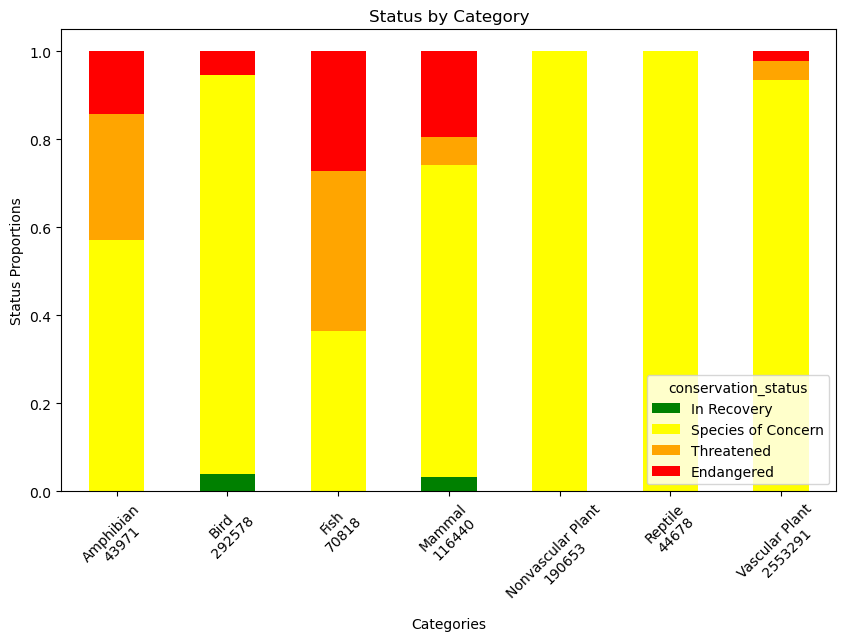

<Figure size 640x480 with 0 Axes>

In [403]:
#4) Question
grouped = species.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
column_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']#reorder
colors = ['green', 'yellow', 'orange', 'red']
grouped_norm = grouped_norm[column_order]
grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Categories') 
plt.ylabel('Status Proportions') 
plt.title('Status by Category')
plt.xticks(rotation=45)

xlabels=[]
for category in ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']:
    string = category
    string += '\n'
    string +=str(category_observations[category])
    xlabels.append(string)
    
plt.gca().set_xticklabels(xlabels)
plt.show()
plt.clf()
#there's no relation between the number of observations and the status of a category

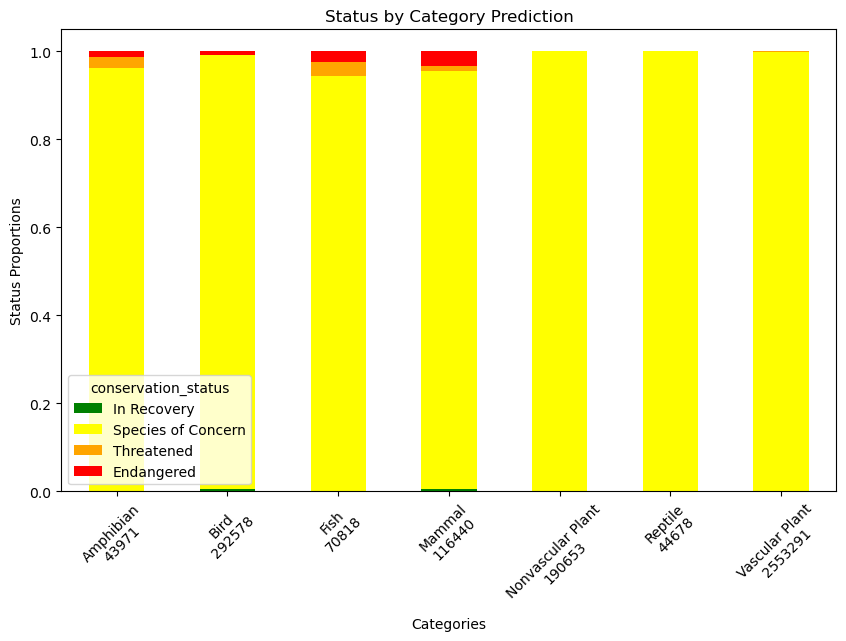

<Figure size 640x480 with 0 Axes>

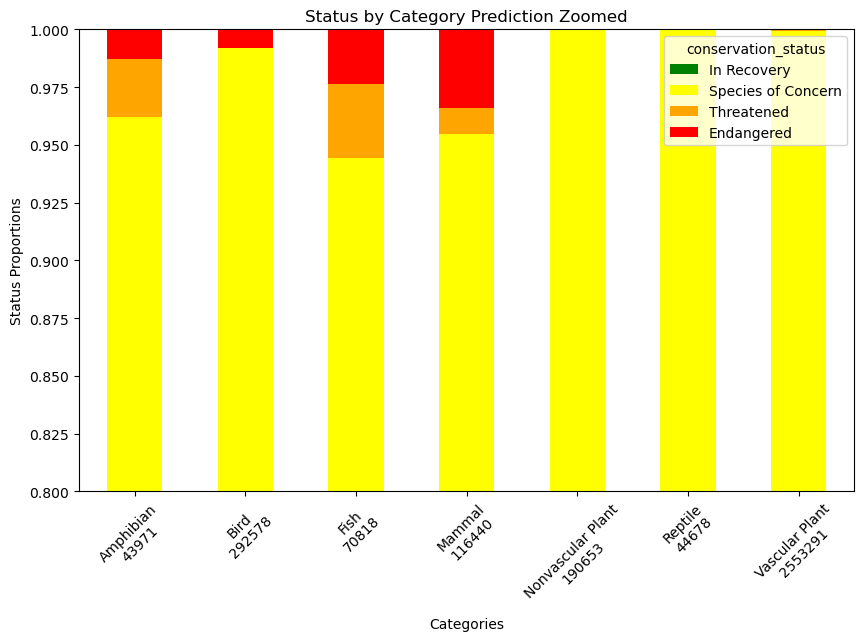

<Figure size 640x480 with 0 Axes>

In [404]:
#the same but with the AI information:
grouped = species_completed.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
column_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']#reorder
colors = ['green', 'yellow', 'orange', 'red']
grouped_norm = grouped_norm[column_order]

xlabels=[]
for category in ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']:
    string = category
    string += '\n'
    string +=str(category_observations[category])
    xlabels.append(string)
    
    
grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Categories') 
plt.ylabel('Status Proportions') 
plt.title('Status by Category Prediction')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(xlabels)
plt.show()
plt.clf()

grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Categories') 
plt.ylabel('Status Proportions') 
plt.title('Status by Category Prediction Zoomed')
plt.xticks(rotation=45)
plt.gca().set_xticklabels(xlabels)
plt.ylim(0.8, 1)#the difference
plt.show()
plt.clf()
#we see the same that with no AI

In [414]:
status_observations = {}
for status in species.conservation_status.unique():
    status_observations[status]=0
print (status_observations)


def increment_dictionary2(name, obs):
    cat = species[species.scientific_name == name]
    key = cat.conservation_status.iloc[0] #we take the status of the 1rst row
    status_observations[key]+=obs

observations.apply(lambda row: increment_dictionary2(row.scientific_name, row.observations), axis=1)
print(status_observations)


{nan: 0, 'Species of Concern': 0, 'Endangered': 0, 'Threatened': 0, 'In Recovery': 0}
{nan: 3223134, 'Species of Concern': 82579, 'Endangered': 2798, 'Threatened': 2526, 'In Recovery': 1392}


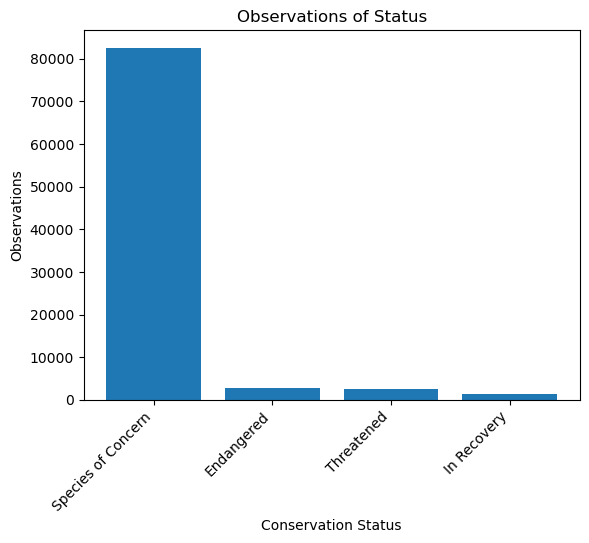

<Figure size 640x480 with 0 Axes>

In [423]:
#are the observations of each status (not category) related with the status type?
status = []
obs =[]
first = True #we will avoid the first value because represents the null ones
for key, value in status_observations.items():
    if first == True:
        first = False
    else:
        status.append(str(key))
        obs.append(int(value))

plt.bar(status, obs)
plt.xlabel('Conservation Status') 
plt.ylabel('Observations')
plt.title('Observations of Status')
plt.xticks(rotation=45, ha='right')#to see the categorical names rotated
plt.show()
plt.clf()
#When in doubt we will assume that the status is 'species of concern' just as the AI said